## 04-01 用電腦來學習

今天我們會簡單介紹 Python 在算數學的時候, 可以用到的一些基本工具。做這個的目的, 除了介紹基本工具, 更重要的是希望大家知道, 「你一定要去寫有意思的程式, 你才有興趣寫下去。」

也就是, 「你要覺得好玩才可以。」也許是我們同學太優秀, 所以似乎不太會找好玩的問題。

另一方面, 如果我們要學的東西就是, 嗯, 什麼貝式統計啦, 假設檢定啦, information theory 啦, 或其他任何有點深奧生硬的主題, 要怎麼辦呢? 一個很好的方法, 就是用 Python 寫程式來幫你學習!

很能代表這樣精神的, 就是 Allen Downey 教授, 他學什麼都寫成程式。他以前是寫 Java 的, 有本很出名的書叫 "How To Think Like a Computer Scientist", 第一版用的是 Java。之後有人覺得這本書太有意思, 和他合寫 Python 版, 然後他的主力程式語言就變成 Python 了!

[【Allen Downey 免費的書下載】](https://greenteapress.com/wp/)

另一個很好的例子是 Mosky, 她是台科大資料系出身, 近來非常認真的唸數學和統計學, 她的

[【Hypothesis Testing with Python】](https://github.com/moskytw/hypothesis-testing-with-python)

就是很好的「用電腦學習」的範例。


## 04-02 進入 array 導向的程式設計

數據分析最重要的概念, 大概是「不到最後關頭, 絕不輕言使用迴圈」。

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

有一班同學成績是這樣的:
    
    grades = [35, 74, 43, 66, 87, 55, 71, 65]

老師想要每位同學成績都是乘 1.1 倍!

In [15]:
grades = [35, 74, 43, 66, 87, 55, 71, 65]

In [16]:
curved =[]

for g in grades:
    curved.append(g*1.1)

In [17]:
curved

[38.5,
 81.4,
 47.300000000000004,
 72.60000000000001,
 95.7,
 60.50000000000001,
 78.10000000000001,
 71.5]

或許再加個 3 分, 於是又...

In [18]:
curved2 = []
for g in curved:
    curved2.append(g+4)
    
curved2

[42.5,
 85.4,
 51.300000000000004,
 76.60000000000001,
 99.7,
 64.5,
 82.10000000000001,
 75.5]

換成 array, 又快又自然!

In [21]:
grad_arr =np.array(grades)

In [23]:
grad_arr

array([35, 74, 43, 66, 87, 55, 71, 65])

In [24]:
grad_arr*1.1

array([38.5, 81.4, 47.3, 72.6, 95.7, 60.5, 78.1, 71.5])

看來還是再加個 3 分...

In [25]:
grad_arr*1.1+4

array([42.5, 85.4, 51.3, 76.6, 99.7, 64.5, 82.1, 75.5])

### 這個就叫 "broadcasting!"

## 04-03 Broadcasting 比我們想像更有趣

一位老師成績這樣算的:

* 平時成績 20%
* 期中考 35%
* 期未考 45%

有位同學

* 平時成績 85 分
* 期中 70 分
* 期末 80 分

這位同學的學期成績是多少?

In [26]:
grades = np.array([85,70,80])
weights = np.array([0.2,0.35,0.45])

In [28]:
wgrades = grades * weights

In [30]:
wgrades

array([17. , 24.5, 36. ])

In [31]:
wgrades.sum()

77.5

我們其實可以用 dot product (矩陣乘法) 算出來!

In [32]:
grades @ weights

77.5

很多同學一起來... 

In [35]:
grades = np.array([[85,70,80],
                   [12,88,77],
                   [85,91,33]])

In [36]:
grades * weights

array([[17.  , 24.5 , 36.  ],
       [ 2.4 , 30.8 , 34.65],
       [17.  , 31.85, 14.85]])

軸的概念!

In [37]:
wgrades = grades * weights

In [38]:
wgrades

array([[17.  , 24.5 , 36.  ],
       [ 2.4 , 30.8 , 34.65],
       [17.  , 31.85, 14.85]])

In [39]:
wgrades.sum(axis=1)#行相加

array([77.5 , 67.85, 63.7 ])

當然我這麼算有點誤導大家...

In [44]:
grades @ weights

array([77.5 , 67.85, 63.7 ])

我把它弄成「正確的矩陣」呢?

In [40]:
weights.shape#3行1列

(3,)

In [42]:
weights.reshape(3,1)

array([[0.2 ],
       [0.35],
       [0.45]])

In [43]:
grades @ weights.reshape(3,1)

array([[77.5 ],
       [67.85],
       [63.7 ]])

## 04-04 重要的 array 大變身

我們在數據分析, 常常要改 array 的型式。

### [練習] 一個 50 個數字的 array

先想辦法、用亂數做出 50 個數字的 array, 叫做 A 好了。

In [48]:
A= np.random.randint(0,10,50)#shift+TAB顯示怎麼用

In [49]:
A

array([1, 7, 6, 8, 5, 3, 2, 1, 7, 7, 1, 9, 1, 1, 1, 0, 9, 4, 9, 6, 5, 6,
       2, 6, 7, 1, 7, 9, 8, 1, 7, 7, 9, 6, 9, 9, 5, 8, 1, 2, 1, 8, 6, 1,
       1, 5, 7, 2, 7, 6])

### 檢查 A 的 shape

In [50]:
A.shape

(50,)

### 更改 A 的 shape

In [69]:
A.shape =(5,10)

In [70]:
A

array([[1, 7, 6, 8, 5, 3, 2, 1, 7, 7],
       [1, 9, 1, 1, 1, 0, 9, 4, 9, 6],
       [5, 6, 2, 6, 7, 1, 7, 9, 8, 1],
       [7, 7, 9, 6, 9, 9, 5, 8, 1, 2],
       [1, 8, 6, 1, 1, 5, 7, 2, 7, 6]])

但用 `reshape` 其實是比較好的方式...

In [71]:
A.reshape(10,5)

array([[1, 7, 6, 8, 5],
       [3, 2, 1, 7, 7],
       [1, 9, 1, 1, 1],
       [0, 9, 4, 9, 6],
       [5, 6, 2, 6, 7],
       [1, 7, 9, 8, 1],
       [7, 7, 9, 6, 9],
       [9, 5, 8, 1, 2],
       [1, 8, 6, 1, 1],
       [5, 7, 2, 7, 6]])

In [73]:
A

array([[1, 7, 6, 8, 5, 3, 2, 1, 7, 7],
       [1, 9, 1, 1, 1, 0, 9, 4, 9, 6],
       [5, 6, 2, 6, 7, 1, 7, 9, 8, 1],
       [7, 7, 9, 6, 9, 9, 5, 8, 1, 2],
       [1, 8, 6, 1, 1, 5, 7, 2, 7, 6]])

In [74]:
A = A.reshape(10,5)
A

array([[1, 7, 6, 8, 5],
       [3, 2, 1, 7, 7],
       [1, 9, 1, 1, 1],
       [0, 9, 4, 9, 6],
       [5, 6, 2, 6, 7],
       [1, 7, 9, 8, 1],
       [7, 7, 9, 6, 9],
       [9, 5, 8, 1, 2],
       [1, 8, 6, 1, 1],
       [5, 7, 2, 7, 6]])

### 拉回成一條向量...

In [75]:
A.ravel()

array([1, 7, 6, 8, 5, 3, 2, 1, 7, 7, 1, 9, 1, 1, 1, 0, 9, 4, 9, 6, 5, 6,
       2, 6, 7, 1, 7, 9, 8, 1, 7, 7, 9, 6, 9, 9, 5, 8, 1, 2, 1, 8, 6, 1,
       1, 5, 7, 2, 7, 6])

In [76]:
A

array([[1, 7, 6, 8, 5],
       [3, 2, 1, 7, 7],
       [1, 9, 1, 1, 1],
       [0, 9, 4, 9, 6],
       [5, 6, 2, 6, 7],
       [1, 7, 9, 8, 1],
       [7, 7, 9, 6, 9],
       [9, 5, 8, 1, 2],
       [1, 8, 6, 1, 1],
       [5, 7, 2, 7, 6]])

### 快速 array 生成法

In [79]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [85]:
np.eye(5)#identity matrix 5*5

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [87]:
np.ones((8,7))

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [91]:
np.diag((1,2,3))

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [92]:
np.diag((1,2,3,4))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

很有趣的是...

In [94]:
A=np.array([[1,2,3],
           [4,5,6],
           [7,8,9]])

In [110]:
A

array([[1, 0, 0],
       [0, 5, 0],
       [0, 0, 9]])

In [111]:
np.diag(A)

array([1, 5, 9])

## 04-05 array 過濾器

array 有個很有趣的用法...

In [97]:
L = np.array([3,-2,-1,5,7,-3])

我們用另一個 array, 把「要的」標 True, 不要的標 False

In [99]:
want = np.array([True , False , False , True , True , False])

也就是我們只要正的...

In [100]:
L[want]

array([3, 5, 7])

其實我們可以這樣做...

In [101]:
L>0

array([ True, False, False,  True,  True, False])

In [102]:
L[L>0]

array([3, 5, 7])

- 補充

In [105]:
L = np.array([3,-2,-1,5,15,-3])

In [115]:
(L>0)&(L<10)

array([ True, False, False,  True, False, False])

In [116]:
L[(L>0)&(L<10)]

array([3, 5])

In [114]:
A=np.array([[1,2,3],
           [4,5,6],
           [7,8,9]])
A - np.diag(np.diag(A))

array([[0, 2, 3],
       [4, 0, 6],
       [7, 8, 0]])

### [練習] 畫個函數 (如 sinc), 標出正的部份!¶

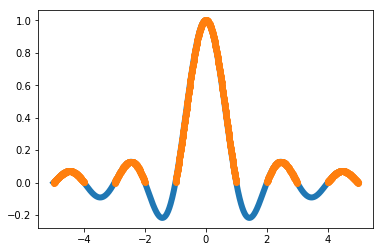

In [120]:
x = np.linspace(-5,5,1000)
y = np.sinc(x)
plt.plot(x,y,lw = 6)

plt.plot(x[y>0],y[y>0],'o')#y>0的x座標才選,y>0的y座標才選

## 04-06 像上數學課一樣算數學!

In [5]:
import sympy as sym

In [6]:
1/2 + 1/3

0.8333333333333333

In [7]:
sym.Rational(1,2)+sym.Rational(1,3)

5/6

先來變美一點...

In [8]:
sym.init_printing()

In [9]:
sym.Rational(1,2)+sym.Rational(1,3)

更方便的做法 -- sympify

In [10]:
sym.S(1)/2+sym.S(1)/3 #(sympy 化的 1 )/ 2 +(sympy 化的 1 ) / 3 

這太常用了, 所以我們讀進來...

In [11]:
from sympy import S ,N

In [12]:
S(1)/2 + S(1)/3

In [13]:
N(S(1)/2 + S(1)/3)

In [14]:
sym.pi

In [15]:
π = sym.pi #\pi + tab

In [16]:
π

In [17]:
N(π,20)

In [18]:
N(π,100)

什麼都在 π 中出現過...

In [19]:
pistring = str(N(π,100000))

In [20]:
pistring[9487]

'7'

In [21]:
'1215' in pistring #1215 這個字串是否在pistring中

True

In [22]:
'9487' in pistring

True

In [23]:
pistring.find('1215')

In [24]:
pistring[11942:11946]

'1215'

## 04-07 質數

In [25]:
a = 9487 

In [27]:
sym.isprime(a)

False

In [29]:
sym.factorint(9487) #質因數分解

In [31]:
53*179

In [33]:
sym.isprime(179)

True

In [35]:
sym.prime(87)#第87個質數

In [36]:
sym.nextprime(449)#449的下一個prime

In [38]:
for i in range(2,50):
    a = sym.prime(i)
    b = sym.prime(i+1)
    if b-a ==2 :
        print(f'{a} 和 {b} 是孿生質數(只差2的質數)')

3 和 5 是孿生質數(只差2的質數)
5 和 7 是孿生質數(只差2的質數)
11 和 13 是孿生質數(只差2的質數)
17 和 19 是孿生質數(只差2的質數)
29 和 31 是孿生質數(只差2的質數)
41 和 43 是孿生質數(只差2的質數)
59 和 61 是孿生質數(只差2的質數)
71 和 73 是孿生質數(只差2的質數)
101 和 103 是孿生質數(只差2的質數)
107 和 109 是孿生質數(只差2的質數)
137 和 139 是孿生質數(只差2的質數)
149 和 151 是孿生質數(只差2的質數)
179 和 181 是孿生質數(只差2的質數)
191 和 193 是孿生質數(只差2的質數)
197 和 199 是孿生質數(只差2的質數)
227 和 229 是孿生質數(只差2的質數)


## 04-08 Sympy 的矩陣

In [39]:
A = sym.Matrix([[2,-1,3],
              [0,1,2],
              [-1,1,2]])

In [41]:
A.det()

In [43]:
A.inv()

⎡ 0     1     -1 ⎤
⎢                ⎥
⎢-2/5  7/5   -4/5⎥
⎢                ⎥
⎣1/5   -1/5  2/5 ⎦

## 04-09 設定 Sympy 的變數

### 第一式

In [44]:
x = sym.Symbol('x')# x represent symbol 'x' 

In [48]:
f = x**2 -3*x + 2

In [49]:
f

In [50]:
sym.diff(f,x)#微分

In [51]:
sym.integrate(f,x)

In [54]:
g = 5*x**2 - 3*x + 9

In [55]:
f+g

In [57]:
f*g

In [60]:
h = 3*k**2 + 3*k + 2 # k 沒有像上面的x定義成symbol ,所以不能做運算

NameError: name 'k' is not defined

In [62]:
k = sym.Symbol('y')# x represent symbol 'x' 

In [63]:
g = 9*k**2

In [64]:
g

### 第二式

In [65]:
from sympy.abc import x,y,z,u

In [75]:
f = x**2 + y** 2
f

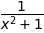

In [67]:
sym.diff(f,x)

In [68]:
sym.integrate(f,x)

In [69]:
sym.integrate(f,(x,0,1))#對X積分，下界是0上界是1